## Activity 5.1: Storefront location associations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
df = pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


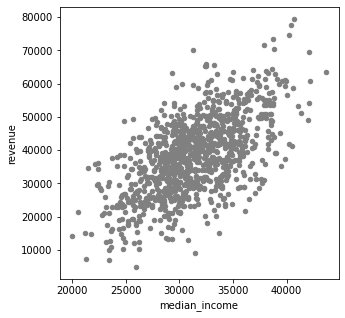

In [2]:
df.plot.scatter("median_income", 'revenue', \
                figsize=[5,5], color='gray')
plt.show()

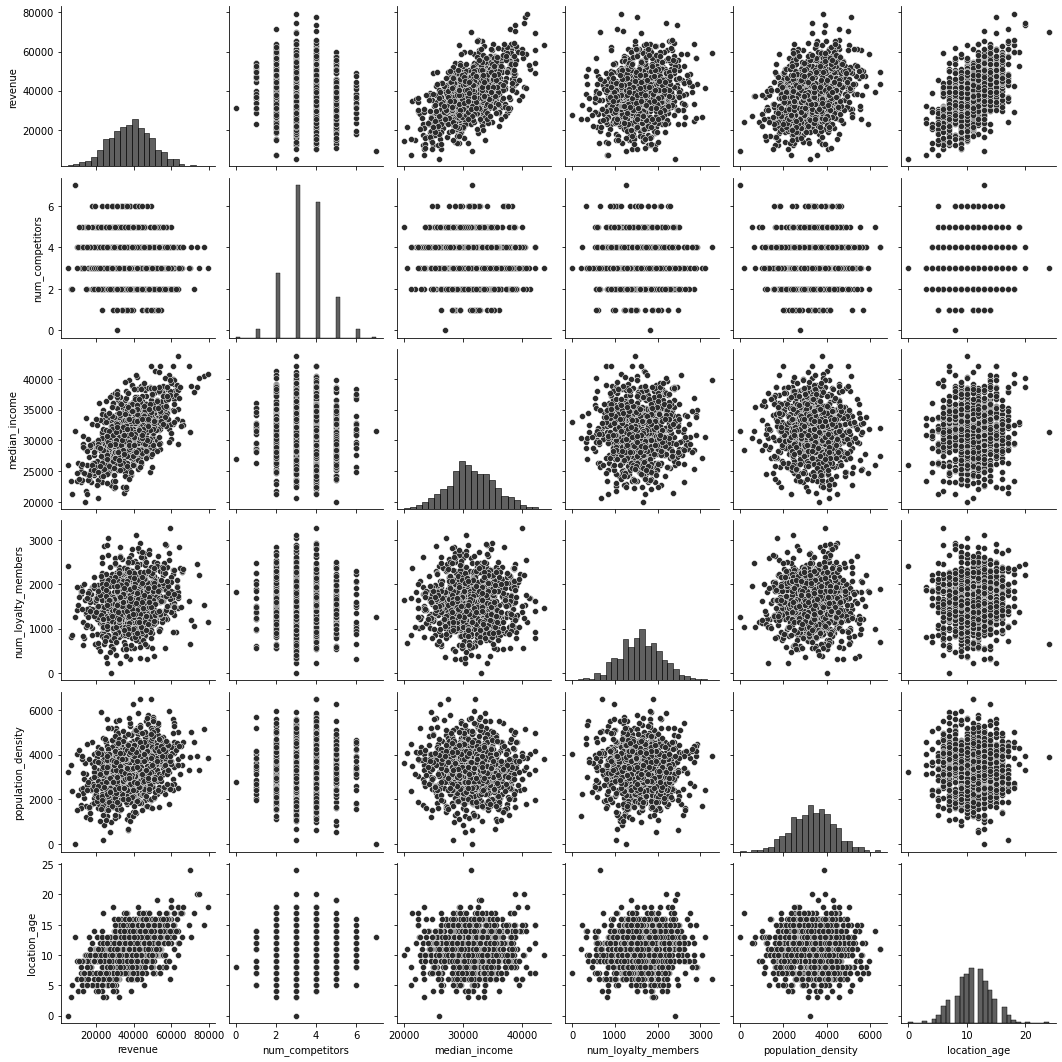

In [3]:
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

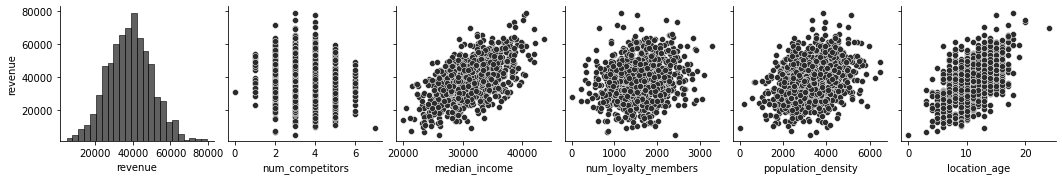

In [4]:
sns.pairplot(df,x_vars=df.columns, y_vars="revenue")
plt.show()

In [5]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


## Activity 5.2

In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [7]:
X = df[['num_competitors',\
       'median_income',\
       'num_loyalty_members',\
       'population_density',\
       'location_age']]
y = df['revenue']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
#Print out the model coefficients:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [11]:
model.intercept_

-51068.63644236374

In [12]:
single_location = pd.DataFrame({'num_competitors': [3],\
                                'median_income': [30000],\
                                'num_loyalty_members': [1200],\
                                'population_density': [2000],\
                                'location_age': [10]})

model.predict(single_location)

array([27573.21782447])

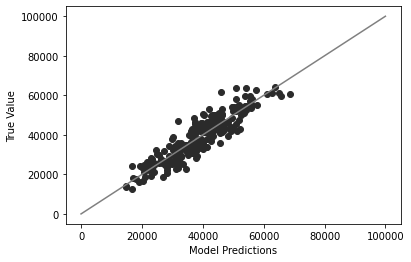

In [13]:
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')
plt.show()

In [14]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])